In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.cluster.hierarchy import cophenet
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering

In [91]:
c,coph_dist=cophenet(dist,pdist(scal_data))

In [ ]:
coph_dist

In [7]:
crime_rate=pd.read_csv('A:/Data Science/assignments/Clustering/crime_data (1).csv')

In [ ]:
crime_rate.head()

In [8]:
crime_rate=crime_rate.rename({'Unnamed: 0':'State'},axis=1)

In [ ]:
crime_rate.dtypes

In [ ]:
crime_rate.describe()

In [ ]:
crime_rate.groupby('State').mean()

In [ ]:
y=pd.pivot_table(crime_rate,index=['State'],values=['Rape'])

In [ ]:
crime_rate.shape

In [9]:
crime_rate1=crime_rate.loc[:,['Murder','Assault','Rape']]

In [ ]:
crime_rate1.shape

In [10]:
#Min Max Scaling
scal=MinMaxScaler()
scal_data=scal.fit_transform(crime_rate1)
scal_data=pd.DataFrame(scal_data,columns=['Murder','Assault','Rape'])

In [11]:
scal_data.describe()

,Murder,Assault,Rape
count,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.360000
std,0.262380,0.285403,0.242025
min,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.200904
50%,0.388554,0.390411,0.330749
75%,0.629518,0.698630,0.487726
max,1.000000,1.000000,1.000000


In [ ]:
type(scal_data)

In [12]:
dist=linkage(scal_data,method='complete',metric='euclidean')

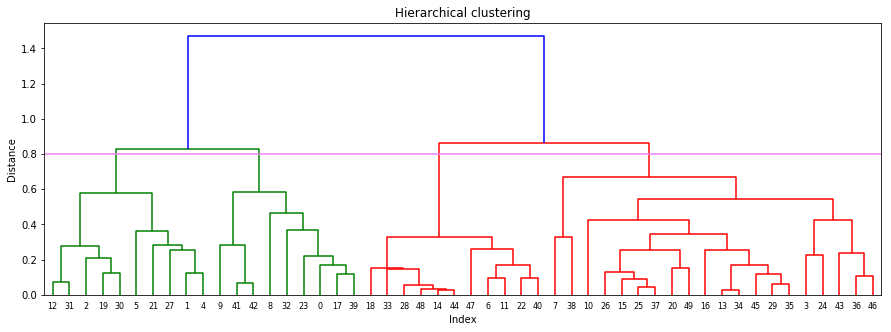

In [44]:
plt.figure(figsize=(15,5));plt.title('Hierarchical clustering');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    dist,
    leaf_rotation=0.,
    leaf_font_size=8.)
plt.axhline(y=0.8,color='violet')

In [17]:
h_complete=AgglomerativeClustering(n_clusters=4,linkage='complete',affinity='euclidean').fit(scal_data)

In [18]:
cluster_lab=pd.Series(h_complete.labels_)

In [20]:
crime_rate['clust']=cluster_lab

In [21]:
crime_rate.head()

,State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3


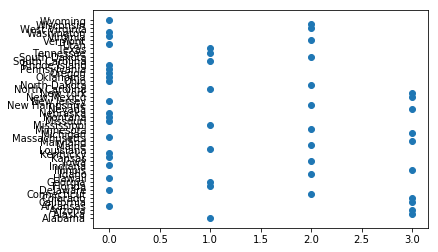

In [23]:
plt.scatter(crime_rate.clust,crime_rate.State)

In [24]:
crime_rate['clust'].value_counts()

0    20
2    11
3    10
1     9
Name: clust, dtype: int64

In [27]:
crime_rate=crime_rate.iloc[:,[5,0,1,2,3,4]]

In [28]:
crime_rate.columns

Index(['clust', 'State', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [37]:
crime_rate.iloc[:,2:].groupby(crime_rate.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,6.250000,140.000000,69.600000,19.315000
1,14.533333,255.000000,60.000000,23.244444
2,2.736364,73.727273,53.363636,10.927273
3,10.350000,263.200000,75.800000,34.590000


In [92]:
def clust1(x):
    if (crime_rate.clust == x).any():
        return  crime_rate[crime_rate['clust']==x]
    
    else:
         y=0

In [93]:
clust1(0)

,clust,State,Murder,Assault,UrbanPop,Rape
3,0,Arkansas,8.8,190,50,19.5
7,0,Delaware,5.9,238,72,15.8
10,0,Hawaii,5.3,46,83,20.2
13,0,Indiana,7.2,113,65,21.0
15,0,Kansas,6.0,115,66,18.0
16,0,Kentucky,9.7,109,52,16.3
20,0,Massachusetts,4.4,149,85,16.3
24,0,Missouri,9.0,178,70,28.2
25,0,Montana,6.0,109,53,16.4
26,0,Nebraska,4.3,102,62,16.5


In [ ]:
#Four clusters are created as the horizontal line passes cuts the vertical line at 4 points.
Cluster 0 has more records compared to other clusters
Murder is high in cluster cluster 1
Assualt is high in cluster cluster 3
Rape is high in cluster 3